In [53]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np  
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

print('Libraries loaded successfully')



Libraries loaded successfully


In [54]:
# load tips dataset
tips = sns.load_dataset('tips')

# define the feature (x) and the target(y)
x = tips[['total_bill']]  # predictor 
y = tips[['tip']]  # target

# 


Understand the data by Visualising it first 

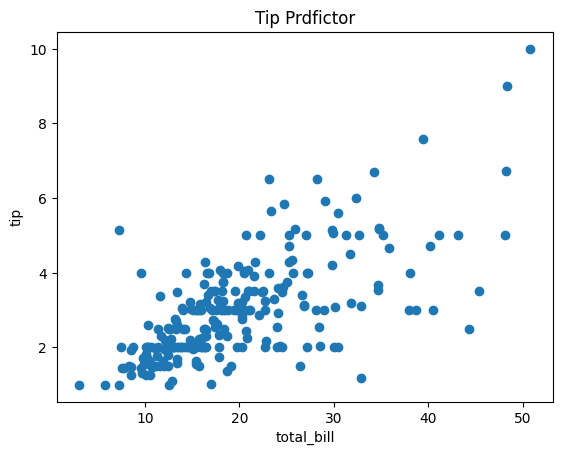

In [55]:
plt.scatter(tips['total_bill'], tips['tip'])
plt.title('Tip Prdfictor')
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

Preparing Data For Machine Learnng 


In [56]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


# building The Model

In [57]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# 
Predict on Test Data

In [58]:
y_pred = model.predict(x_test)
y_pred

array([[3.04525623],
       [1.86330727],
       [3.55119456],
       [3.69452593],
       [2.31576375],
       [2.83881627],
       [3.96728338],
       [2.26014262],
       [2.50615915],
       [2.57033737],
       [2.88160176],
       [2.07723468],
       [2.06439904],
       [2.47407003],
       [2.00236009],
       [2.91903905],
       [2.92652651],
       [3.23351235],
       [2.68478854],
       [5.33107064],
       [3.13831465],
       [3.13403611],
       [2.4558862 ],
       [1.94673896],
       [3.16077703],
       [2.17564129],
       [2.02375283],
       [3.62927807],
       [2.68906708],
       [6.07767732],
       [4.99734388],
       [1.75313465],
       [2.83025918],
       [3.09552917],
       [2.74040966],
       [3.50092162],
       [2.21200895],
       [5.53644096],
       [2.33287794],
       [3.35010279],
       [2.04942412],
       [2.47834858],
       [3.48701634],
       [2.03017065],
       [2.03124029],
       [1.25361414],
       [2.05798121],
       [2.924

# lets Visualise our Model

In [59]:
print(f" slope (m): {model.coef_[0].item():,.2f}")
print(f" intercept (b): {model.intercept_[0].item():,.2f}")

 slope (m): 0.11
 intercept (b): 0.93


# 
Evaluaate The Model Accuracy

In [60]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
print(f" Mean Squared Error: {mse:.2f}")
print(f" Root Squared Error: {rmse:.2f}")
print(f" R-Squared Score:    {r2:.2f}")    # Y = MX + B


 Mean Squared Error: 0.57
 Root Squared Error: 0.75
 R-Squared Score:    0.54


# VISUALISE THE PREDICTED TIP AND THE ACTUAL TIP

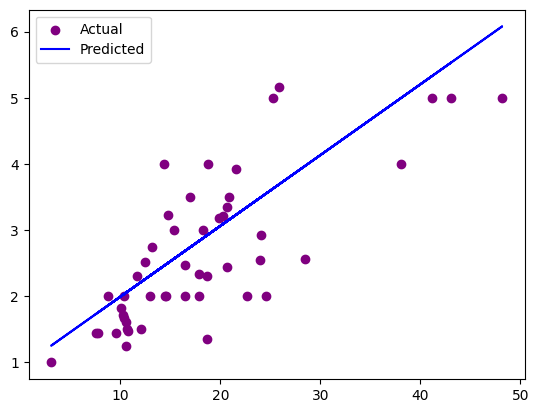

In [61]:
plt.scatter(x_test, y_test, color='purple', label='Actual')
plt.plot(x_test, y_pred, color='blue', label='Predicted')
plt.legend()
plt.show()

# Saving Our Model

In [62]:
joblib.dump(model, 'Tip_Predictor.joblib')

['Tip_Predictor.joblib']

# Import And Use Model

In [66]:
# first load the model
loaded_model = joblib.load('Tip_Predictor.joblib')

# predict using the loaeded model
new_bill = pd.DataFrame({'total_bill': [600]})

predicted_tip = loaded_model.predict(new_bill)
print(f"predicted tip for $120 bill: {predicted_tip[0].item():,.2f}")


predicted tip for $120 bill: 65.10
